In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from datetime import datetime
import seaborn as sns
import os
import numpy as np
import tkinter as tk
from tkinter import font
import ttkbootstrap as ttk
import datetime
import sys


In [2]:
class App(tk.Tk):
    def __init__(self):
        super().__init__()

        # Set basic window configuration
        self.protocol("WM_DELETE_WINDOW", self.on_close)  # Set the action for when the window is closed
        self.title("DCA Performance Analyzer")  # Set the window title
        self.configure(bg='black')  # Set the background color of the window

        # Get the screen dimensions
        screen_width = self.winfo_screenwidth()
        screen_height = self.winfo_screenheight()

        # Set the window dimensions
        window_width = screen_width
        window_height = screen_height
        print(window_height, window_width)  # Optional: Output the window dimensions to console

        # Set the window position to the top-left corner of the screen
        left = 0
        top = 0

        # Apply geometry settings: full screen with specified position
        self.geometry(f'{window_width}x{window_height}+{left}+{top}')

        # Set the minimum size of the window
        self.minsize(1400, 900)  # Minimum width and height

        # Initialize primary investment variables
        self.ticker_symbol_var = tk.StringVar(value='SPY')
        self.start_date_var = tk.StringVar(value='2019-01-01')
        self.end_date_var = tk.StringVar(value='2024-01-01')
        self.interval_var = tk.IntVar(value=20)
        self.monthly_investment_var = tk.IntVar(value=100)
        self.fee_percentage_var = tk.DoubleVar(value=0.0003)
        self.min_fee_var = tk.DoubleVar(value=1)

        # Initialize secondary investment variables
        self.ticker_symbol_var_2 = tk.StringVar(value='SPY')
        self.start_date_var_2 = tk.StringVar(value='2019-01-01')
        self.end_date_var_2 = tk.StringVar(value='2024-01-01')
        self.interval_var_2 = tk.IntVar(value=20)
        self.monthly_investment_var_2 = tk.IntVar(value=100)
        self.fee_percentage_var_2 = tk.DoubleVar(value=0.0003)
        self.min_fee_var_2 = tk.DoubleVar(value=1)

        # Initialize output variables for the first set of data
        self.ticker_symbol_var_output = tk.StringVar()
        self.start_date_var_output = tk.StringVar()
        self.end_date_var_output = tk.StringVar()
        self.interval_var_output = tk.StringVar()
        self.monthly_investment_var_output = tk.StringVar()
        self.fee_percentage_var_output = tk.StringVar()
        self.min_fee_var_output = tk.StringVar()
        self.cumulative_return_var_output = tk.StringVar()
        self.annualized_return_var_output = tk.StringVar()
        self.max_loss_var_output = tk.StringVar()
        self.longest_consecutive_loss_var_output = tk.StringVar()
        self.streak_period_var_output = tk.StringVar()
        self.total_cash_var_output = tk.StringVar()
        self.total_value_var_output = tk.StringVar()

        # Initialize output variables for the second set of data
        self.ticker_symbol_var_output_2 = tk.StringVar()
        self.start_date_var_output_2 = tk.StringVar()
        self.end_date_var_output_2 = tk.StringVar()
        self.interval_var_output_2 = tk.StringVar()
        self.monthly_investment_var_output_2 = tk.StringVar()
        self.fee_percentage_var_output_2 = tk.StringVar()
        self.min_fee_var_output_2 = tk.StringVar()
        self.cumulative_return_var_output_2 = tk.StringVar()
        self.annualized_return_var_output_2 = tk.StringVar()
        self.max_loss_var_output_2 = tk.StringVar()
        self.longest_consecutive_loss_var_output_2 = tk.StringVar()
        self.streak_period_var_output_2 = tk.StringVar()
        self.total_cash_var_output_2 = tk.StringVar()
        self.total_value_var_output_2 = tk.StringVar()

        # Create Tkinter StringVar instances for duration statistics dynamically
        statistic_types = ['mean', 'median', 'upper', 'lower', 'sd', 'mode']
        for i in range(1, 11):  # Assuming duration indices range from 1 to 10
            for stat in statistic_types:
                var_name = f"duration_{i}_{stat}_var_output"
                setattr(self, var_name, tk.StringVar())

        # Define interval return variables
        self.interval_weekly_return_var_output = tk.StringVar()
        self.interval_monthly_return_var_output = tk.StringVar()
        self.interval_quarterly_return_var_output = tk.StringVar()
        self.interval_semiannually_return_var_output = tk.StringVar()
        self.interval_annually_return_var_output = tk.StringVar()

        # Define interval max loss variables
        self.interval_weekly_max_loss_var_output = tk.StringVar()
        self.interval_monthly_max_loss_var_output = tk.StringVar()
        self.interval_quarterly_max_loss_var_output = tk.StringVar()
        self.interval_semiannually_max_loss_var_output = tk.StringVar()
        self.interval_annually_max_loss_var_output = tk.StringVar()

        # Define variables for multiples
        self.multiple_2_var_output = tk.StringVar()
        self.multiple_3_var_output = tk.StringVar()
        self.multiple_4_var_output = tk.StringVar()
        self.multiple_5_var_output = tk.StringVar()
        self.multiple_6_var_output = tk.StringVar()

        # Define variable for application status label
        self.status_label_var_output = tk.StringVar()

        # Define variable for duration start/end date
        self.duration_start_end_date = tk.StringVar()

        # Define variables for projected values (30 years)
        for i in range(1, 31):
            var_name = "projected_cash_{}".format(i)
            setattr(self, var_name, tk.StringVar())
            var_name = "projected_optimistic_{}".format(i)
            setattr(self, var_name, tk.StringVar())
            var_name = "projected_median_{}".format(i)
            setattr(self, var_name, tk.StringVar())
            var_name = "projected_conservative_{}".format(i)
            setattr(self, var_name, tk.StringVar())
            var_name = "projected_prob_gain_{}".format(i)
            setattr(self, var_name, tk.StringVar())

        # Configure column and row weights for grid layout
        self.columnconfigure((0, 1, 2, 3, 4, 5), weight=1, uniform='a')
        self.rowconfigure((0, 1, 2, 3), weight=1, uniform='a')

        # Define styling attributes
        border_width = 1
        relief_type = tk.FLAT
        header_font = font.Font(weight='bold', size=14)
        entry_box_color = "orange"
        font_color = "black"
        outline_color = "black"
        header_color = 'grey30'
        background_color = 'black'
        label_color = 'orange'

        # Create Frame 1 with styling attributes
        frame1 = tk.Frame(self, borderwidth=border_width, relief=relief_type, bg=background_color)
        frame1.grid(row=0, column=0, rowspan=2, sticky='news')  # outside the groove
        # Configure row and column weights for Frame 1
        frame1.rowconfigure((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17), weight=0)
        frame1.rowconfigure(16, weight=1)
        frame1.columnconfigure((0, 1), weight=1)
        # Create Label for Frame 1
        label1 = tk.Label(frame1, text='USER INPUT', font=header_font, bg=header_color)
        label1.grid(row=0, column=0, columnspan=2, sticky='ew')
        # Create labels for entry fields
        ticker_symbol_label = tk.Label(frame1, text="Ticker Symbol", fg=label_color, bg=background_color)
        start_date_label = tk.Label(frame1, text="Start Date", fg=label_color, bg=background_color)
        end_date_label = tk.Label(frame1, text="End Date", fg=label_color, bg=background_color)
        interval_label = tk.Label(frame1, text="Interval (Days)", fg=label_color, bg=background_color)
        monthly_investment_label = tk.Label(frame1, text="Monthly Investment", fg=label_color, bg=background_color)
        fee_percentage_label = tk.Label(frame1, text="Fee (1% = 0.01)", fg=label_color, bg=background_color)
        min_fee_label = tk.Label(frame1, text="Min Fee", fg=label_color, bg=background_color)
        status_label = tk.Label(frame1, textvariable=self.status_label_var_output, bg=background_color)
        # Create Entry widgets for the first set of variables
        ticker_symbol_entry = tk.Entry(frame1, textvariable=self.ticker_symbol_var, justify=tk.CENTER,
                                        bg=entry_box_color, fg=font_color, insertbackground=font_color,
                                        highlightthickness=1, highlightbackground=outline_color)
        start_date_entry = tk.Entry(frame1, textvariable=self.start_date_var, justify=tk.CENTER,
                                    bg=entry_box_color, fg=font_color, insertbackground=font_color,
                                    highlightthickness=1, highlightbackground=outline_color)
        end_date_entry = tk.Entry(frame1, textvariable=self.end_date_var, justify=tk.CENTER,
                                bg=entry_box_color, fg=font_color, insertbackground=font_color,
                                highlightthickness=1, highlightbackground=outline_color)
        interval_entry = tk.Entry(frame1, textvariable=self.interval_var, justify=tk.CENTER,
                                bg=entry_box_color, fg=font_color, insertbackground=font_color,
                                highlightthickness=1, highlightbackground=outline_color)
        monthly_investment_entry = tk.Entry(frame1, textvariable=self.monthly_investment_var, justify=tk.CENTER,
                                            bg=entry_box_color, fg=font_color, insertbackground=font_color,
                                            highlightthickness=1, highlightbackground=outline_color)
        fee_percentage_entry = tk.Entry(frame1, textvariable=self.fee_percentage_var, justify=tk.CENTER,
                                        bg=entry_box_color, fg=font_color, insertbackground=font_color,
                                        highlightthickness=1, highlightbackground=outline_color)
        min_fee_entry = tk.Entry(frame1, textvariable=self.min_fee_var, justify=tk.CENTER,
                                bg=entry_box_color, fg=font_color, insertbackground=font_color,
                                highlightthickness=1, highlightbackground=outline_color)
        # Create Entry widgets for the second set of variables
        ticker_symbol_entry_2 = tk.Entry(frame1, textvariable=self.ticker_symbol_var_2, justify=tk.CENTER,
                                        bg=entry_box_color, fg=font_color, insertbackground=font_color,
                                        highlightthickness=1, highlightbackground=outline_color)
        start_date_entry_2 = tk.Entry(frame1, textvariable=self.start_date_var_2, justify=tk.CENTER,
                                    bg=entry_box_color, fg=font_color, insertbackground=font_color,
                                    highlightthickness=1, highlightbackground=outline_color)
        end_date_entry_2 = tk.Entry(frame1, textvariable=self.end_date_var_2, justify=tk.CENTER,
                                    bg=entry_box_color, fg=font_color, insertbackground=font_color,
                                    highlightthickness=1, highlightbackground=outline_color)
        interval_entry_2 = tk.Entry(frame1, textvariable=self.interval_var_2, justify=tk.CENTER,
                                    bg=entry_box_color, fg=font_color, insertbackground=font_color,
                                    highlightthickness=1, highlightbackground=outline_color)
        monthly_investment_entry_2 = tk.Entry(frame1, textvariable=self.monthly_investment_var_2, justify=tk.CENTER,
                                            bg=entry_box_color, fg=font_color, insertbackground=font_color,
                                            highlightthickness=1, highlightbackground=outline_color)
        fee_percentage_entry_2 = tk.Entry(frame1, textvariable=self.fee_percentage_var_2, justify=tk.CENTER,
                                            bg=entry_box_color, fg=font_color, insertbackground=font_color,
                                            highlightthickness=1, highlightbackground=outline_color)
        min_fee_entry_2 = tk.Entry(frame1, textvariable=self.min_fee_var_2, justify=tk.CENTER,
                                    bg=entry_box_color, fg=font_color, insertbackground=font_color,
                                    highlightthickness=1, highlightbackground=outline_color)
        
        # Grid placement for labels and entry widgets
        labels = [ticker_symbol_label, start_date_label, end_date_label,
                  interval_label, monthly_investment_label, fee_percentage_label, min_fee_label]
        entries = [ticker_symbol_entry, start_date_entry, end_date_entry,
                   interval_entry, monthly_investment_entry, fee_percentage_entry, min_fee_entry]
        entries_2 = [ticker_symbol_entry_2, start_date_entry_2, end_date_entry_2,
                     interval_entry_2, monthly_investment_entry_2, fee_percentage_entry_2, min_fee_entry_2]
        for i, (label, entry, entry_2) in enumerate(zip(labels, entries, entries_2), start=1):
            label.grid(row=i*2-1, column=0, columnspan=2, sticky='ew')
            entry.grid(row=i*2, column=0, sticky='ew')
            entry_2.grid(row=i*2, column=1, sticky='ew')
        status_label.grid(row=16, column=0, columnspan=2, sticky='sew')

        # Create and place the button
        analyze_button = tk.Button(frame1, text="I'm Feeling Lucky", command=self.press_analyze_button,
                                font=("Helvetica", 20, "bold"))
        analyze_button.grid(row=17, column=0, columnspan=2, sticky='ew', padx=5, pady=5)

        # Create frame2 with border, relief, and background color
        frame2 = tk.Frame(self, borderwidth=border_width, relief=relief_type, bg=background_color)
        frame2.grid(row=0, column=1, rowspan=2, columnspan=2, sticky='news')  # outside the groove
        # Configure row and column weights for frame2
        frame2.rowconfigure((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13), weight=1)
        frame2.rowconfigure(0, weight=0)
        frame2.columnconfigure(0, weight=0)
        frame2.columnconfigure((1, 2, 3), weight=1)
        # Create label for frame2
        label2 = tk.Label(frame2, text='PAST PERFORMANCE & QUICK COMPARE', font=header_font, bg=header_color)
        label2.grid(row=0, column=0, columnspan=4, sticky='news')

        # List of text for labels
        labels_text = [
            "Ticker", "Start Date", "End Date", "Interval", "Fee", "Minimum Fee",
            "Cumulative Return", "Annualized Return", "Max Loss", "Loss Streak",
            "Streak Period", "Original Cash", "Total Value"
        ]
        # List of associated text variables
        labels_var = [
            self.ticker_symbol_var_output, self.start_date_var_output, self.end_date_var_output,
            self.interval_var_output, self.fee_percentage_var_output, self.min_fee_var_output,
            self.cumulative_return_var_output, self.annualized_return_var_output,
            self.max_loss_var_output, self.longest_consecutive_loss_var_output,
            self.streak_period_var_output, self.total_cash_var_output, self.total_value_var_output
        ]
        labels_var_2 = [
            self.ticker_symbol_var_output_2, self.start_date_var_output_2, self.end_date_var_output_2,
            self.interval_var_output_2, self.fee_percentage_var_output_2, self.min_fee_var_output_2,
            self.cumulative_return_var_output_2, self.annualized_return_var_output_2,
            self.max_loss_var_output_2, self.longest_consecutive_loss_var_output_2,
            self.streak_period_var_output_2, self.total_cash_var_output_2, self.total_value_var_output_2
        ]
        # Create and place labels
        for i, (text, var, var_2) in enumerate(zip(labels_text, labels_var, labels_var_2), start=1):
             # Create and place label for the first column
            label = tk.Label(frame2, text=text, bg=background_color)
            label.grid(row=i, column=0, sticky='e', padx=5, pady=5)
             # Create and place label for the second column
            label_var = tk.Label(frame2, textvariable=var, fg=label_color, bg=background_color)
            label_var.grid(row=i, column=1, sticky='e', padx=5, pady=5)
            # Create and place label for the third column
            label_var_2 = tk.Label(frame2, textvariable=var_2, fg=label_color, bg=background_color)
            label_var_2.grid(row=i, column=2, sticky='e', padx=5, pady=5)

        # Create and configure frame3
        frame3 = tk.Frame(self, borderwidth=border_width, relief=relief_type, bg=background_color)
        frame3.grid(row=2, column=1, columnspan=2, rowspan=2, sticky='news')
        frame3.rowconfigure(0, weight=0)
        frame3.rowconfigure((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), weight=1)
        frame3.columnconfigure(0, weight=0)
        frame3.columnconfigure((1, 2, 3, 4, 5, 6, 7), weight=1)
        # Header label for duration impact information
        tk.Label(frame3, text='DURATION IMPACT (LIFETIME)', font=header_font, bg=header_color).grid(row=0, column=0, columnspan=8, sticky='news')
        # Label for displaying start and end dates
        tk.Label(frame3, textvariable=self.duration_start_end_date, font=('Helvetica', 10, 'italic'), bg=background_color).grid(row=12, column=0, columnspan=8, sticky='ne', padx=5, pady=5)
        # Labels for duration impact data
        tk.Label(frame3, text="Duration", bg=background_color).grid(row=1, column=0, sticky='e', padx=5, pady=5)
        tk.Label(frame3, text="Median (%)", bg=background_color).grid(row=1, column=2, sticky='e', padx=5, pady=5)
        tk.Label(frame3, text="Upper (%)", bg=background_color).grid(row=1, column=3, sticky='e', padx=5, pady=5)
        tk.Label(frame3, text="Lower (%)", bg=background_color).grid(row=1, column=4, sticky='e', padx=5, pady=5)
        tk.Label(frame3, text="Mean (%)", bg=background_color).grid(row=1, column=1, sticky='e', padx=5, pady=5)
        tk.Label(frame3, text="SD (%)", bg=background_color).grid(row=1, column=5, sticky='e', padx=5, pady=5)

        # Creating labels for duration values
        tk.Label(frame3, text="1", bg=background_color).grid(row=2, column=0, sticky='e', padx=5, pady=5)
        tk.Label(frame3, text="2", bg=background_color).grid(row=3, column=0, sticky='e', padx=5, pady=5)
        tk.Label(frame3, text="3", bg=background_color).grid(row=4, column=0, sticky='e', padx=5, pady=5)
        tk.Label(frame3, text="4", bg=background_color).grid(row=5, column=0, sticky='e', padx=5, pady=5)
        tk.Label(frame3, text="5", bg=background_color).grid(row=6, column=0, sticky='e', padx=5, pady=5)
        tk.Label(frame3, text="6", bg=background_color).grid(row=7, column=0, sticky='e', padx=5, pady=5)
        tk.Label(frame3, text="7", bg=background_color).grid(row=8, column=0, sticky='e', padx=5, pady=5)
        tk.Label(frame3, text="8", bg=background_color).grid(row=9, column=0, sticky='e', padx=5, pady=5)
        tk.Label(frame3, text="9", bg=background_color).grid(row=10, column=0, sticky='e', padx=5, pady=5)
        tk.Label(frame3, text="10", bg=background_color).grid(row=11, column=0, sticky='e', padx=5, pady=5)

        # Create and grid labels for duration mean variables (need to assign variable for this)
        self.label3_14 = tk.Label(frame3, textvariable=self.duration_1_mean_var_output, fg=label_color, bg=background_color).grid(row=2, column=1, sticky='e', padx=5, pady=5)
        self.label3_14 = tk.Label(frame3, textvariable=self.duration_1_mean_var_output, fg=label_color, bg=background_color)
        self.label3_24 = tk.Label(frame3, textvariable=self.duration_2_mean_var_output, fg=label_color, bg=background_color)
        self.label3_34 = tk.Label(frame3, textvariable=self.duration_3_mean_var_output, fg=label_color, bg=background_color)
        self.label3_44 = tk.Label(frame3, textvariable=self.duration_4_mean_var_output, fg=label_color, bg=background_color)
        self.label3_54 = tk.Label(frame3, textvariable=self.duration_5_mean_var_output, fg=label_color, bg=background_color)
        self.label3_64 = tk.Label(frame3, textvariable=self.duration_6_mean_var_output, fg=label_color, bg=background_color)
        self.label3_74 = tk.Label(frame3, textvariable=self.duration_7_mean_var_output, fg=label_color, bg=background_color)
        self.label3_84 = tk.Label(frame3, textvariable=self.duration_8_mean_var_output, fg=label_color, bg=background_color)
        self.label3_94 = tk.Label(frame3, textvariable=self.duration_9_mean_var_output, fg=label_color, bg=background_color)
        self.label3_104 = tk.Label(frame3, textvariable=self.duration_10_mean_var_output, fg=label_color, bg=background_color)      
        self.label3_14.grid(row=2, column=1, sticky='e', padx=5, pady=5)
        self.label3_24.grid(row=3, column=1, sticky='e', padx=5, pady=5)
        self.label3_34.grid(row=4, column=1, sticky='e', padx=5, pady=5)
        self.label3_44.grid(row=5, column=1, sticky='e', padx=5, pady=5)
        self.label3_54.grid(row=6, column=1, sticky='e', padx=5, pady=5)
        self.label3_64.grid(row=7, column=1, sticky='e', padx=5, pady=5)
        self.label3_74.grid(row=8, column=1, sticky='e', padx=5, pady=5)
        self.label3_84.grid(row=9, column=1, sticky='e', padx=5, pady=5)
        self.label3_94.grid(row=10, column=1, sticky='e', padx=5, pady=5)
        self.label3_104.grid(row=11, column=1, sticky='e', padx=5, pady=5)
        # Create and grid labels for duration standard deviation variables (need to assign variable for this)
        self.label3_15 = tk.Label(frame3, textvariable=self.duration_1_sd_var_output, fg=label_color, bg=background_color)
        self.label3_25 = tk.Label(frame3, textvariable=self.duration_2_sd_var_output, fg=label_color, bg=background_color)
        self.label3_35 = tk.Label(frame3, textvariable=self.duration_3_sd_var_output, fg=label_color, bg=background_color)
        self.label3_45 = tk.Label(frame3, textvariable=self.duration_4_sd_var_output, fg=label_color, bg=background_color)
        self.label3_55 = tk.Label(frame3, textvariable=self.duration_5_sd_var_output, fg=label_color, bg=background_color)
        self.label3_65 = tk.Label(frame3, textvariable=self.duration_6_sd_var_output, fg=label_color, bg=background_color)
        self.label3_75 = tk.Label(frame3, textvariable=self.duration_7_sd_var_output, fg=label_color, bg=background_color)
        self.label3_85 = tk.Label(frame3, textvariable=self.duration_8_sd_var_output, fg=label_color, bg=background_color)
        self.label3_95 = tk.Label(frame3, textvariable=self.duration_9_sd_var_output, fg=label_color, bg=background_color)
        self.label3_105 = tk.Label(frame3, textvariable=self.duration_10_sd_var_output, fg=label_color, bg=background_color)
        self.label3_15.grid(row=2, column=5, sticky='e', padx=5, pady=5)
        self.label3_25.grid(row=3, column=5, sticky='e', padx=5, pady=5)
        self.label3_35.grid(row=4, column=5, sticky='e', padx=5, pady=5)
        self.label3_45.grid(row=5, column=5, sticky='e', padx=5, pady=5)
        self.label3_55.grid(row=6, column=5, sticky='e', padx=5, pady=5)
        self.label3_65.grid(row=7, column=5, sticky='e', padx=5, pady=5)
        self.label3_75.grid(row=8, column=5, sticky='e', padx=5, pady=5)
        self.label3_85.grid(row=9, column=5, sticky='e', padx=5, pady=5)
        self.label3_95.grid(row=10, column=5, sticky='e', padx=5, pady=5)
        self.label3_105.grid(row=11, column=5, sticky='e', padx=5, pady=5)
        # Create and grid labels for duration median variables (need to assign variable for this)
        self.label3_11 = tk.Label(frame3, textvariable=self.duration_1_median_var_output, fg=label_color, bg=background_color)
        self.label3_21 = tk.Label(frame3, textvariable=self.duration_2_median_var_output, fg=label_color, bg=background_color)
        self.label3_31 = tk.Label(frame3, textvariable=self.duration_3_median_var_output, fg=label_color, bg=background_color)
        self.label3_41 = tk.Label(frame3, textvariable=self.duration_4_median_var_output, fg=label_color, bg=background_color)
        self.label3_51 = tk.Label(frame3, textvariable=self.duration_5_median_var_output, fg=label_color, bg=background_color)
        self.label3_61 = tk.Label(frame3, textvariable=self.duration_6_median_var_output, fg=label_color, bg=background_color)
        self.label3_71 = tk.Label(frame3, textvariable=self.duration_7_median_var_output, fg=label_color, bg=background_color)
        self.label3_81 = tk.Label(frame3, textvariable=self.duration_8_median_var_output, fg=label_color, bg=background_color)
        self.label3_91 = tk.Label(frame3, textvariable=self.duration_9_median_var_output, fg=label_color, bg=background_color)
        self.label3_101 = tk.Label(frame3, textvariable=self.duration_10_median_var_output, fg=label_color, bg=background_color)
        self.label3_11.grid(row=2, column=2, sticky='e', padx=5, pady=5)
        self.label3_21.grid(row=3, column=2, sticky='e', padx=5, pady=5)
        self.label3_31.grid(row=4, column=2, sticky='e', padx=5, pady=5)
        self.label3_41.grid(row=5, column=2, sticky='e', padx=5, pady=5)
        self.label3_51.grid(row=6, column=2, sticky='e', padx=5, pady=5)
        self.label3_61.grid(row=7, column=2, sticky='e', padx=5, pady=5)
        self.label3_71.grid(row=8, column=2, sticky='e', padx=5, pady=5)
        self.label3_81.grid(row=9, column=2, sticky='e', padx=5, pady=5)
        self.label3_91.grid(row=10, column=2, sticky='e', padx=5, pady=5)
        self.label3_101.grid(row=11, column=2, sticky='e', padx=5, pady=5)
        # Create and grid labels for duration lower variables (need to assign variable for this)
        self.label3_13 = tk.Label(frame3, textvariable=self.duration_1_lower_var_output, fg=label_color, bg=background_color)
        self.label3_23 = tk.Label(frame3, textvariable=self.duration_2_lower_var_output, fg=label_color, bg=background_color)
        self.label3_33 = tk.Label(frame3, textvariable=self.duration_3_lower_var_output, fg=label_color, bg=background_color)
        self.label3_43 = tk.Label(frame3, textvariable=self.duration_4_lower_var_output, fg=label_color, bg=background_color)
        self.label3_53 = tk.Label(frame3, textvariable=self.duration_5_lower_var_output, fg=label_color, bg=background_color)
        self.label3_63 = tk.Label(frame3, textvariable=self.duration_6_lower_var_output, fg=label_color, bg=background_color)
        self.label3_73 = tk.Label(frame3, textvariable=self.duration_7_lower_var_output, fg=label_color, bg=background_color)
        self.label3_83 = tk.Label(frame3, textvariable=self.duration_8_lower_var_output, fg=label_color, bg=background_color)
        self.label3_93 = tk.Label(frame3, textvariable=self.duration_9_lower_var_output, fg=label_color, bg=background_color)
        self.label3_103 = tk.Label(frame3, textvariable=self.duration_10_lower_var_output, fg=label_color, bg=background_color)
        self.label3_13.grid(row=2, column=4, sticky='e', padx=5, pady=5)
        self.label3_23.grid(row=3, column=4, sticky='e', padx=5, pady=5)
        self.label3_33.grid(row=4, column=4, sticky='e', padx=5, pady=5)
        self.label3_43.grid(row=5, column=4, sticky='e', padx=5, pady=5)
        self.label3_53.grid(row=6, column=4, sticky='e', padx=5, pady=5)
        self.label3_63.grid(row=7, column=4, sticky='e', padx=5, pady=5)
        self.label3_73.grid(row=8, column=4, sticky='e', padx=5, pady=5)
        self.label3_83.grid(row=9, column=4, sticky='e', padx=5, pady=5)
        self.label3_93.grid(row=10, column=4, sticky='e', padx=5, pady=5)
        self.label3_103.grid(row=11, column=4, sticky='e', padx=5, pady=5)
        # Create and grid labels for duration upper variables (need to assign variable for this)
        self.label3_12 = tk.Label(frame3, textvariable=self.duration_1_upper_var_output, fg=label_color, bg=background_color)
        self.label3_22 = tk.Label(frame3, textvariable=self.duration_2_upper_var_output, fg=label_color, bg=background_color)
        self.label3_32 = tk.Label(frame3, textvariable=self.duration_3_upper_var_output, fg=label_color, bg=background_color)
        self.label3_42 = tk.Label(frame3, textvariable=self.duration_4_upper_var_output, fg=label_color, bg=background_color)
        self.label3_52 = tk.Label(frame3, textvariable=self.duration_5_upper_var_output, fg=label_color, bg=background_color)
        self.label3_62 = tk.Label(frame3, textvariable=self.duration_6_upper_var_output, fg=label_color, bg=background_color)
        self.label3_72 = tk.Label(frame3, textvariable=self.duration_7_upper_var_output, fg=label_color, bg=background_color)
        self.label3_82 = tk.Label(frame3, textvariable=self.duration_8_upper_var_output, fg=label_color, bg=background_color)
        self.label3_92 = tk.Label(frame3, textvariable=self.duration_9_upper_var_output, fg=label_color, bg=background_color)
        self.label3_102 = tk.Label(frame3, textvariable=self.duration_10_upper_var_output, fg=label_color, bg=background_color)
        self.label3_12.grid(row=2, column=3, sticky='e', padx=5, pady=5)
        self.label3_22.grid(row=3, column=3, sticky='e', padx=5, pady=5)
        self.label3_32.grid(row=4, column=3, sticky='e', padx=5, pady=5)
        self.label3_42.grid(row=5, column=3, sticky='e', padx=5, pady=5)
        self.label3_52.grid(row=6, column=3, sticky='e', padx=5, pady=5)
        self.label3_62.grid(row=7, column=3, sticky='e', padx=5, pady=5)
        self.label3_72.grid(row=8, column=3, sticky='e', padx=5, pady=5)
        self.label3_82.grid(row=9, column=3, sticky='e', padx=5, pady=5)
        self.label3_92.grid(row=10, column=3, sticky='e', padx=5, pady=5)
        self.label3_102.grid(row=11, column=3, sticky='e', padx=5, pady=5)

        # Create and configure the frame
        frame4 = tk.Frame(self, borderwidth=border_width, relief=relief_type, bg=background_color)
        frame4.grid(row=2, column=0, sticky='news')
        frame4.rowconfigure(0, weight=0)
        frame4.rowconfigure((1, 2, 3, 4, 5), weight=1)
        frame4.columnconfigure(0, weight=0)
        frame4.columnconfigure((1, 2, 3), weight=1)
        # Create and grid the label for the header
        tk.Label(frame4, text='INTERVAL IMPACT (STATED PERIOD)', font=header_font, bg=header_color).grid(row=0, column=0, columnspan=4, sticky='news')

        # Create and grid the labels for the header
        tk.Label(frame4, text="Interval", bg=background_color).grid(row=1, column=0, sticky='e', padx=5, pady=5)
        tk.Label(frame4, text="Return (%)", bg=background_color).grid(row=1, column=1, sticky='e', padx=5, pady=5)
        tk.Label(frame4, text="Max Loss (%)", bg=background_color).grid(row=1, column=2, sticky='e', padx=5, pady=5)
        # Create and grid the labels for intervals
        tk.Label(frame4, text="Weekly", bg=background_color).grid(row=2, column=0, sticky='e', padx=5, pady=5)
        tk.Label(frame4, text="Monthly", bg=background_color).grid(row=3, column=0, sticky='e', padx=5, pady=5)
        tk.Label(frame4, text="Quarterly", bg=background_color).grid(row=4, column=0, sticky='e', padx=5, pady=5)
        tk.Label(frame4, text="Semiannually", bg=background_color).grid(row=5, column=0, sticky='e', padx=5, pady=5)
        tk.Label(frame4, text="Annually", bg=background_color).grid(row=6, column=0, sticky='e', padx=5, pady=5)
        # Create and grid the labels for weekly return and max loss
        tk.Label(frame4, textvariable=self.interval_weekly_return_var_output, fg=label_color, bg=background_color).grid(row=2, column=1, sticky='e', padx=5, pady=5)
        tk.Label(frame4, textvariable=self.interval_weekly_max_loss_var_output, fg=label_color, bg=background_color).grid(row=2, column=2, sticky='e', padx=5, pady=5)
        # Create and grid the labels for monthly return and max loss
        tk.Label(frame4, textvariable=self.interval_monthly_return_var_output, fg=label_color, bg=background_color).grid(row=3, column=1, sticky='e', padx=5, pady=5)
        tk.Label(frame4, textvariable=self.interval_monthly_max_loss_var_output, fg=label_color, bg=background_color).grid(row=3, column=2, sticky='e', padx=5, pady=5)
        # Create and grid the labels for quarterly return and max loss
        tk.Label(frame4, textvariable=self.interval_quarterly_return_var_output, fg=label_color, bg=background_color).grid(row=4, column=1, sticky='e', padx=5, pady=5)
        tk.Label(frame4, textvariable=self.interval_quarterly_max_loss_var_output, fg=label_color, bg=background_color).grid(row=4, column=2, sticky='e', padx=5, pady=5)
        # Create and grid the labels for semiannually return and max loss
        tk.Label(frame4, textvariable=self.interval_semiannually_return_var_output, fg=label_color, bg=background_color).grid(row=5, column=1, sticky='e', padx=5, pady=5)
        tk.Label(frame4, textvariable=self.interval_semiannually_max_loss_var_output, fg=label_color, bg=background_color).grid(row=5, column=2, sticky='e', padx=5, pady=5)
        # Create and grid the labels for annually return and max loss
        tk.Label(frame4, textvariable=self.interval_annually_return_var_output, fg=label_color, bg=background_color).grid(row=6, column=1, sticky='e', padx=5, pady=5)
        tk.Label(frame4, textvariable=self.interval_annually_max_loss_var_output, fg=label_color, bg=background_color).grid(row=6, column=2, sticky='e', padx=5, pady=5)


        # Get the current year
        current_year = datetime.datetime.now().year
        # Create a new frame for displaying projected returns
        frame5 = tk.Frame(self, borderwidth=border_width, relief=relief_type, bg=background_color)
        frame5.grid(row=0, column=3, columnspan=3, rowspan=4, sticky='news')
        # Configure column weights for frame5
        frame5.columnconfigure(0, weight=0)
        frame5.columnconfigure((1,2,3,4,5,6), weight=1)
        # Configure row weights for frame5
        frame5.rowconfigure(0, weight=0)
        frame5.rowconfigure((1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32), weight=1)
        # Label for displaying projected returns header
        tk.Label(frame5, text='PROJECTED RETURNS', font=header_font, bg=header_color).grid(row=0, column=0, columnspan=7, sticky='ew')
        # Label for displaying additional information about projections
        tk.Label(frame5, text='*Both optimal and conservative values are at 5% chance.\n*Projections beyond {} are extrapolated based on data and trends observed in {}.'.format(current_year+10, current_year+10), font=('Helvetica', 10, 'italic'), justify='right', bg=background_color).grid(row=32, column=0, columnspan=7, sticky='ne', padx=5, pady=5)
        # Labels for displaying column headers
        tk.Label(frame5, text='Year', bg=background_color).grid(row=1, column=0, sticky='e', padx=5, pady=5)
        tk.Label(frame5, text='Original Cash ($)', bg=background_color).grid(row=1, column=1, sticky='e', padx=5, pady=5)
        tk.Label(frame5, text='Optimal ($)', bg=background_color).grid(row=1, column=2, sticky='e', padx=5, pady=5)
        tk.Label(frame5, text='Median ($)', bg=background_color).grid(row=1, column=3, sticky='e', padx=5, pady=5)
        tk.Label(frame5, text='Conservative ($)', bg=background_color).grid(row=1, column=4, sticky='e', padx=5, pady=5)
        tk.Label(frame5, text='Preservation (%)', bg=background_color).grid(row=1, column=5, sticky='e', padx=0, pady=5)


        # Loop to create labels for displaying years and projected cash, optimistic, median, conservative, and probability of gain
        for i in range(1, 31):
            # Check if the year is beyond the current year + 10
            if i > 10:
                tk.Label(frame5, text="*"+str(current_year+i), bg=background_color).grid(row=1+i, column=0, sticky='e', padx=5, pady=5)
            else:
                tk.Label(frame5, text=str(current_year+i), bg=background_color).grid(row=1+i, column=0, sticky='e', padx=5, pady=5)
            # Get the respective variables for each projection
            cash_var = getattr(self, f"projected_cash_{i}")
            optimistic_var = getattr(self, f"projected_optimistic_{i}")
            median_var = getattr(self, f"projected_median_{i}")
            conservative_var = getattr(self, f"projected_conservative_{i}")
            prob_gain_var = getattr(self, f"projected_prob_gain_{i}")
            # Create labels and grid them within frame5
            tk.Label(frame5, textvariable=cash_var, fg=label_color, bg=background_color).grid(row=i+1, column=1, sticky='e', padx=5, pady=5)
            tk.Label(frame5, textvariable=optimistic_var, fg=label_color, bg=background_color).grid(row=i+1, column=2, sticky='e', padx=5, pady=5)
            tk.Label(frame5, textvariable=median_var, fg=label_color, bg=background_color).grid(row=i+1, column=3, sticky='e', padx=5, pady=5)
            tk.Label(frame5, textvariable=conservative_var, fg=label_color, bg=background_color).grid(row=i+1, column=4, sticky='e', padx=5, pady=5)
            tk.Label(frame5, textvariable=prob_gain_var, fg=label_color, bg=background_color).grid(row=i+1, column=5, sticky='e', padx=0, pady=5)

        # Create and configure the frame
        frame6 = tk.Frame(self, borderwidth=border_width, relief=relief_type, bg=background_color)
        frame6.grid(row=3, column=0, sticky='news')
        frame6.columnconfigure(0, weight=0)
        frame6.columnconfigure((1, 2), weight=1)
        frame6.rowconfigure(0, weight=0)
        frame6.rowconfigure((1, 2, 3, 4, 5), weight=1)
        # Create and grid the label for the header
        label6 = tk.Label(frame6, text='MULTIPLES OF TOTAL/CASH', font=header_font, bg=header_color)
        label6.grid(row=0, column=0, columnspan=3, sticky='ew')

        # Create and grid the labels for the header
        tk.Label(frame6, text="Multiple", bg=background_color).grid(row=1, column=0, sticky='e', padx=5, pady=5)
        tk.Label(frame6, text="Additional Days", bg=background_color).grid(row=1, column=1, sticky='e', pady=5)
        # Create and grid the labels for multiples
        tk.Label(frame6, text="2x", bg=background_color).grid(row=2, column=0, sticky='e', padx=5, pady=5)
        tk.Label(frame6, text="3x", bg=background_color).grid(row=3, column=0, sticky='e', padx=5, pady=5)
        tk.Label(frame6, text="4x", bg=background_color).grid(row=4, column=0, sticky='e', padx=5, pady=5)
        tk.Label(frame6, text="5x", bg=background_color).grid(row=5, column=0, sticky='e', padx=5, pady=5)
        tk.Label(frame6, text="6x", bg=background_color).grid(row=6, column=0, sticky='e', padx=5, pady=5)
        # Create and grid the labels for multiples with variables
        tk.Label(frame6, textvariable=self.multiple_2_var_output, fg=label_color, bg=background_color).grid(row=2, column=1, sticky='e', pady=5)
        tk.Label(frame6, textvariable=self.multiple_3_var_output, fg=label_color, bg=background_color).grid(row=3, column=1, sticky='e', pady=5)
        tk.Label(frame6, textvariable=self.multiple_4_var_output, fg=label_color, bg=background_color).grid(row=4, column=1, sticky='e', pady=5)
        tk.Label(frame6, textvariable=self.multiple_5_var_output, fg=label_color, bg=background_color).grid(row=5, column=1, sticky='e', pady=5)
        tk.Label(frame6, textvariable=self.multiple_6_var_output, fg=label_color, bg=background_color).grid(row=6, column=1, sticky='e', pady=5)

        # Bind the '<Escape>' key event to quit the application when pressed
        self.bind('<Escape>', lambda event: self.quit())

        # Start the Tkinter event loop to handle user interactions
        self.mainloop()

    def on_close(self):
        """Callback function to handle cleanup tasks when the window is closed."""
        # Print a message indicating the cleanup process has started
        print("Cleaning up...")
        # Call the clear_widgets method to remove all widgets from the window
        self.clear_widgets()
        # Destroy the window
        self.destroy()
        # Print a message indicating the cleanup process has finished
        print("Cleaned up.")

    def clear_widgets(self):
        """Destroy all widgets in the window."""
        # Print a message indicating the destruction process has started
        print("Destroying widgets...")
        # Iterate over all widgets in the window and destroy each one
        for widget in self.winfo_children():
            widget.destroy()
        # Print a message indicating the destruction process has finished
        print("Widgets destroyed.")

    def fetch_stock_data(self, ticker_symbol):
        """
        Fetch historical market data and dividend data for the given ticker symbol.
        Args:
            ticker_symbol (str): The ticker symbol of the stock.
        Returns:
            pandas.DataFrame: Historical market data and dividend data.
        """
        # Print a message indicating the data fetching process has started
        print("Fetching ${} data...".format(ticker_symbol))
        
        # Download the historical market data
        stock_data = yf.download(ticker_symbol, progress=False)

        # Download the dividend data
        ticker = yf.Ticker(ticker_symbol)
        dividends = ticker.dividends

        # Create a new DataFrame to include dividends
        # First, ensure that the DataFrame has a column for dividends, initialized to zero
        stock_data['Dividends'] = 0.0

        # Ensure the data.index is timezone-naive
        stock_data.index = stock_data.index.tz_localize(None)

        # Convert the dividends index to timezone-naive
        dividends.index = dividends.index.tz_localize(None)

        # Add a new column to label the day of the week
        stock_data['Day of Week'] = stock_data.index.day_name()

        # Calculate Simple Moving Averages (SMA)
        stock_data['50 SMA'] = stock_data['Close'].rolling(window=50).mean()
        stock_data['100 SMA'] = stock_data['Close'].rolling(window=100).mean()
        stock_data['125 SMA'] = stock_data['Close'].rolling(window=125).mean()
        stock_data['200 SMA'] = stock_data['Close'].rolling(window=200).mean()

        # Reset the index of the DataFrame
        stock_data = stock_data.reset_index()

        # Print a message indicating the data fetching process has finished
        print("${} data fetched.".format(ticker_symbol))

        # Return the combined DataFrame containing historical market data and dividend data
        return stock_data

    def dca_basic(self, interval, monthly_investment, ticker_symbol, start_date, end_date, fee_percentage, min_fee):
        """
        Perform the Basic Dollar Cost Averaging (DCA) strategy.
        Args:
            interval (int): The interval between investments in days.
            monthly_investment (float): The amount of money to invest each month.
            ticker_symbol (str): The ticker symbol of the stock.
            start_date (str): The start date of the investment period.
            end_date (str): The end date of the investment period.
            fee_percentage (float): The percentage fee incurred for each investment.
            min_fee (float): The minimum fee incurred for each investment.
        Returns:
            pandas.DataFrame: Performance data of the DCA strategy.
        """
        print("Performing Basic DCA Strategy...")

        # Getting stock data
        stock_data = self.fetch_stock_data(ticker_symbol)
        stock_data = stock_data[(stock_data['Date'] >= start_date) & (stock_data['Date'] <= end_date)]
        stock_data.reset_index(drop=True, inplace=True)

        invested_amount = 0.0
        cash_balance = 0.0
        num_shares = 0.0
        original_cash = 0.0
        performance_data = []

        for index, data in stock_data[0:].iterrows():
            date = data['Date']
            price = data['Close']
            dividend = data['Dividends']
            price_bought_at = 0
            num_shares_bought = 0
            investing_amount = 0
            dividend_balance = 0

            # Increasing cash balance from pay check
            if index % 20 == 0 and index != 0:
                cash_balance += monthly_investment
                original_cash += monthly_investment

            # Decrease cash balance to invest
            if index % interval == 0 and cash_balance != 0:
                investing_amount = monthly_investment / (20 / interval)
                if dividend_balance != 0:
                    investing_amount += dividend_balance
                    dividend_balance = 0
                fees_incurred = max(investing_amount * fee_percentage, min_fee)
                cash_balance -= investing_amount
                invested_amount += investing_amount - fees_incurred
                investing_amount -= fees_incurred
                num_shares += investing_amount / price
                price_bought_at = price
                num_shares_bought = investing_amount / price

            # Increasing cash balance from dividend
            if dividend != 0:
                dividend_balance += dividend

            total = cash_balance + num_shares * price

            try:
                t_c = total / original_cash
            except ZeroDivisionError:
                t_c = 1

            performance_data.append((date, original_cash, cash_balance, invested_amount, num_shares * price, total,
                                    t_c, investing_amount, price_bought_at, num_shares_bought))

        performance_data = pd.DataFrame(performance_data, columns=['Date', 'Original Cash', 'Cash Balance', 'Capital',
                                                                'Investment', 'Total', 'Total/Cash', 'Investing Amount',
                                                                'Price Bought At', 'Num Shares Bought'])

        performance_data['Performance'] = performance_data['Total/Cash'] - 1

        print("Basic DCA Strategy completed.")

        return performance_data

    def dca_basic_projection(self, monthly_investment):
         
        annual_investment = monthly_investment * 12

        def calculate_final(annual_investment, compound_rate, period):
            """
            Calculate the final amount after a certain period using compound interest.
            Args:
                annual_investment (float): The annual investment amount.
                compound_rate (float): The compound interest rate.
                period (int): The number of periods.
            Returns:
                float: The final amount after the specified period.
            """
            if period == 1:
                return annual_investment * (1 + compound_rate) ** period
            else:
                return annual_investment * (1 + compound_rate) ** period + calculate_final(annual_investment, compound_rate, period - 1)

        # Iterate through each year up to 30
        for i in range(1, 31):
            # Adjust the year index for fetching duration values
            j = i
            j = 10 if i > 10 else i  # For beyond 10th year, use 10th year values

            # Fetch duration upper, median, and lower values
            upper = getattr(self, f"duration_{j}_upper_var_output")
            median = getattr(self, f"duration_{j}_median_var_output")
            lower = getattr(self, f"duration_{j}_lower_var_output")

            # Extract numerical values from the fetched text variables
            upper_value = upper.get().replace('%', '')
            median_value = median.get().replace('%', '')
            lower_value = lower.get().replace('%', '')

            # Fetch projected cash, optimistic, median, and conservative values
            cash = getattr(self, f"projected_cash_{i}")
            optimistic = getattr(self, f"projected_optimistic_{i}")
            median = getattr(self, f"projected_median_{i}")
            conservative = getattr(self, f"projected_conservative_{i}")

            # If there are no values for upper, set all to NA
            if upper_value != 'NA':
                # Calculate and set the projected cash, optimistic, median, and conservative values
                cash.set("{:,.2f}".format(annual_investment * (i)))
                optimistic.set("{:,.2f}".format(calculate_final(annual_investment, float(upper_value) / 100, i)))
                median.set("{:,.2f}".format(calculate_final(annual_investment, float(median_value) / 100, i)))
                conservative.set("{:,.2f}".format(calculate_final(annual_investment, float(lower_value) / 100, i)))
            else:
                # Set all values to NA if upper is NA
                cash.set("NA")
                optimistic.set("NA")
                median.set("NA")
                conservative.set("NA")

    def get_final_growth_each_investment(self, performance_data):
        # Filter out rows where the 'Price Bought At' is zero
        filtered_data = performance_data.loc[performance_data['Price Bought At'] != 0].copy()
        # Get the current price
        current_price = filtered_data['Price Bought At'].iloc[-1]
        # Calculate the final growth for each investment
        filtered_data['Growth'] = current_price * filtered_data['Num Shares Bought']
        return filtered_data
    
    def get_return(self, performance_data):
        # Calculate cumulative return
        cumulative_return = performance_data['Performance'].iloc[-1]

        # Calculate the total number of days between the earliest and latest date in the dataset
        days = (performance_data['Date'].max() - performance_data['Date'].min()).days
        
        # Calculate the annualized return using the formula for annualized return
        annualized_return = (1 + cumulative_return) ** (365 / days) - 1

        return cumulative_return, annualized_return

    def get_cash_and_total(self, performance_data):
        # Get the total original cash invested
        total_cash = performance_data['Original Cash'].iloc[-1]
        
        # Get the total portfolio value at the end of the investment period
        total_value = performance_data['Total'].iloc[-1]

        return total_cash, total_value
    
    def get_longest_negative_period(self, performance_data):
        # Find the longest consecutive negative period
        consecutive_periods = []
        current_consecutive_start = None

        for index, row in performance_data.iterrows():
            if row['Performance'] < 0:
                if current_consecutive_start is None:
                    current_consecutive_start = row['Date']
            else:
                if current_consecutive_start is not None:
                    consecutive_periods.append(
                        (current_consecutive_start, row['Date']))
                    current_consecutive_start = None

        if current_consecutive_start is not None:
            consecutive_periods.append(
                (current_consecutive_start, performance_data['Date'].iloc[-1]))

        # Get the duration of the longest consecutive negative period
        longest_duration = 0
        longest_period_start = None
        longest_period_end = None

        for start, end in consecutive_periods:
            duration = (pd.to_datetime(end) - pd.to_datetime(start)).days
            if duration > longest_duration:
                longest_duration = duration
                longest_period_start = start
                longest_period_end = end

        return longest_duration, longest_period_start, longest_period_end

    def get_multiples_achievement_period(self, performance_data):

        print("Getting multiples achievement period")
        # Initialize an empty list to store the results
        results = []

        # Initialize an empty dictionary to store the first date each multiple is reached
        multiples_achievement_dates = {}

        # Iterate over each row in the DataFrame
        for index, row in performance_data.iterrows():
            total_cash_value = row['Total/Cash']
            date = row['Date']

            # For each multiple from 2 up to the max 'Total/Cash' value in the DataFrame
            for multiple in range(1, int(performance_data['Total/Cash'].max()) + 1):
                # Check if this multiple is already recorded; if not, check if the current row achieves it
                if multiple not in multiples_achievement_dates and total_cash_value >= multiple:
                    # Record the first date this multiple was reached
                    multiples_achievement_dates[multiple] = date

                     # Calculate the days from the start until this date
                    days = (row['Date'] -
                            performance_data['Date'].iloc[0]).days

                    # Append the result to the list
                    results.append(
                        {'Multiple': multiple, 'Date': row['Date'], 'Days': days})

        # Convert the list of dictionaries to a DataFrame
        multiples_df = pd.DataFrame(results)

        # Calculate additional days between each multiple
        multiples_df['Additional Days'] = multiples_df['Date'].diff().dt.days
        # Fill NaN values with the corresponding 'Days' value
        multiples_df['Additional Days'].fillna(
            multiples_df['Date'], inplace=True)
        multiples_df = multiples_df.reset_index(drop=False)

        return multiples_df

    def get_max_loss(self, performance_data):
        # Calculate maximum loss (drawdown)
        max_loss = abs(performance_data['Performance'].min())

        # Find start and end dates of the maximum loss
        min_difference_index = performance_data['Performance'].idxmin()
        max_loss_date = performance_data.loc[min_difference_index, 'Date']

        # Find the index of the last positive performance before the maximum loss
        last_positive_index = performance_data.loc[:min_difference_index, 'Performance'][::-1].gt(0).idxmax()
        # Find the start date of the maximum loss period
        max_loss_start = performance_data.loc[last_positive_index + 1, 'Date']

        # Find the index of the first positive performance after the maximum loss
        first_positive_index = performance_data.loc[min_difference_index:, 'Performance'].lt(0).idxmin()
        # Find the end date of the maximum loss period
        max_loss_end = performance_data.loc[first_positive_index, 'Date']

        return max_loss, max_loss_date, max_loss_start, max_loss_end

    def press_analyze_button(self):
        # Update status label to indicate analysis is in progress
        self.status_label_var_output.set("Analyzing...")
        # Schedule the perform_analysis method to be called after 1 second
        self.after(1000, self.perform_analysis)

    def dca_duration_analysis(self, interval, monthly_investment, ticker_symbol, fee_percentage, min_fee):

        # Fetch stock data
        stock_data = self.fetch_stock_data(ticker_symbol)
        stock_data.reset_index(drop=True, inplace=True)

        # Initialize variables
        invested_amount = 0.0
        cash_balance = 0.0
        num_shares = 0.0
        original_cash = 0.0
        performance_data = []

        # Perform Dollar Cost Avergaging (DCA)
        for index, data in stock_data[0:].iterrows():
            date = data['Date']
            price = data['Close']
            dividend = data['Dividends']

            # Increasing cash balance from pay check
            if index % 20 == 0 and index != 0:
                cash_balance += monthly_investment
                original_cash += monthly_investment

            # Decrease cash balance to invest
            if index % interval == 0 and cash_balance != 0:
                investing_amount = monthly_investment / (20 / interval)
                fees_incurred = max(min_fee, investing_amount * fee_percentage)
                cash_balance -= investing_amount
                investing_amount -= fees_incurred
                invested_amount += investing_amount
                num_shares += investing_amount / price

            # Increasing cash balance from dividend
            if dividend != 0:
                cash_balance += dividend

            # Calculate Total Value
            total = cash_balance + num_shares * price

            try:
                t_c = total / original_cash
            except ZeroDivisionError:
                t_c = 1

            performance_data.append((date,
                                     original_cash,
                                     cash_balance,
                                     invested_amount,
                                     num_shares * price,
                                     total,
                                     t_c))
            
        # Create DataFrame for performance data
        performance_data = pd.DataFrame(performance_data, columns=['Date',
                                                                   'Original Cash',
                                                                   'Cash Balance',
                                                                   'Capital',
                                                                   'Investment',
                                                                   'Total',
                                                                   'Total/Cash'])

        # Calculate returns for various durations
        sizes = [240, 480, 720, 960, 1200, 1440, 1680, 1920, 2160, 2400]
        total_rows = len(performance_data)
        result = []

        for size in sizes:
            if size <= total_rows:
                for i in range(total_rows-size+1):
                    data = performance_data.iloc[i:i+size]
                    last = data['Total/Cash'].iloc[-1]
                    first = data['Total/Cash'].iloc[0]
                    cumulative_return = last / first - 1
                    # Calculate annualized return
                    days = (data['Date'].max() - data['Date'].min()).days
                    annualized_return = (
                        1 + cumulative_return) ** (365 / days) - 1
                    result.append((size, cumulative_return, annualized_return))

        # Create DataFrame for results
        result = pd.DataFrame(
            result, columns=['Duration', 'Cumulative Return', 'Annualized Return'])
        
        # Generate duration string
        first_date = performance_data['Date'].iloc[0]
        last_date = performance_data['Date'].iloc[-1]
        duration_str = "*Data from {} to {}.".format(first_date.strftime('%Y-%m-%d'), last_date.strftime('%Y-%m-%d'))

        return result, duration_str

    def dca_interval_analysis(self, monthly_investment, ticker_symbol, fee_percentage, min_fee, start_date, end_date):
        # Define the frequencies (intervals) for analysis
        frequencies = [5, 20, 60, 120, 240]

        # Initialize lists to store annualized returns and max losses
        annualized_return_list = []
        max_loss_list = []

        # Iterate over each interval
        for interval in frequencies:
            # Perform basic DCA analysis for the current interval
            performance_data = self.dca_basic(interval, monthly_investment, ticker_symbol,
                                            start_date, end_date, fee_percentage, min_fee)

            # Calculate annualized return and max loss for the current interval
            _, annualized_return = self.get_return(performance_data)
            max_loss, _, _, _ = self.get_max_loss(performance_data)

            # Append the results to the respective lists
            annualized_return_list.append(annualized_return)
            max_loss_list.append(max_loss)

        # Return the lists of annualized returns and max losses
        return annualized_return_list, max_loss_list

    def perform_analysis(self):

        print("Performing DCA analysis...")
        # Get values from the entry variables for the first investment
        interval = int(self.interval_var.get())
        monthly_investment = int(self.monthly_investment_var.get())
        ticker_symbol = self.ticker_symbol_var.get()
        start_date = self.start_date_var.get()
        end_date = self.end_date_var.get()
        fee_percentage = float(self.fee_percentage_var.get())
        min_fee = float(self.min_fee_var.get())

        # Get values from the entry variables for the second investment
        interval_2 = int(self.interval_var_2.get())
        monthly_investment_2 = int(self.monthly_investment_var_2.get())
        ticker_symbol_2 = self.ticker_symbol_var_2.get()
        start_date_2 = self.start_date_var_2.get()
        end_date_2 = self.end_date_var_2.get()
        fee_percentage_2 = float(self.fee_percentage_var_2.get())
        min_fee_2 = float(self.min_fee_var_2.get())

        # Perform basic dollar-cost averaging (DCA) analysis for the first investment and for the second investment
        performance_data = self.dca_basic(
            interval, monthly_investment, ticker_symbol, start_date, end_date, fee_percentage, min_fee)
        performance_data_2 = self.dca_basic(
            interval_2, monthly_investment_2, ticker_symbol_2, start_date_2, end_date_2, fee_percentage_2, min_fee_2)

        # Get total cash, total value, maximum loss, cumulative return, annualized return, and longest negative period for the first and second investment
        total_cash, total_value = self.get_cash_and_total(performance_data)
        max_loss, _, _, _ = self.get_max_loss(performance_data)
        cumulative_return, annualized_return = self.get_return(performance_data)
        longest_duration, longest_period_start, longest_period_end = self.get_longest_negative_period(performance_data)
        total_cash_2, total_value_2 = self.get_cash_and_total(performance_data_2)
        max_loss_2, _, _, _ = self.get_max_loss(performance_data_2)
        cumulative_return_2, annualized_return_2 = self.get_return(performance_data_2)
        longest_duration_2, longest_period_start_2, longest_period_end_2 = self.get_longest_negative_period(performance_data_2)

        # Set output values for the first investment
        self.ticker_symbol_var_output.set("{}".format(ticker_symbol))
        self.start_date_var_output.set("{}".format(
            performance_data["Date"].iloc[0].strftime('%Y-%m-%d')))
        self.end_date_var_output.set("{}".format(
            performance_data["Date"].iloc[-1].strftime('%Y-%m-%d')))
        self.interval_var_output.set("Every {} Days".format(interval))
        self.fee_percentage_var_output.set(
            "{}%".format(round(fee_percentage * 100, 2)))
        self.min_fee_var_output.set("${:,.2f}".format(min_fee))
        self.cumulative_return_var_output.set(
            "{}%".format(round(cumulative_return * 100, 2)))
        self.annualized_return_var_output.set("{}%".format(
            round(annualized_return * 100, 2)))
        self.max_loss_var_output.set("{}%".format(round(max_loss * 100, 2)))
        self.longest_consecutive_loss_var_output.set(
            "{} days".format(longest_duration))
        self.streak_period_var_output.set("{} to {}".format(
            longest_period_start.strftime('%Y-%m-%d'), longest_period_end.strftime('%Y-%m-%d')))
        self.total_cash_var_output.set("${:,.2f}".format(round(total_cash, 2)))
        self.total_value_var_output.set("${:,.2f}".format(round(total_value, 2)))

        # Set output values for the second investment
        self.ticker_symbol_var_output_2.set("{}".format(ticker_symbol_2))
        self.start_date_var_output_2.set("{}".format(
            performance_data_2["Date"].iloc[0].strftime('%Y-%m-%d')))
        self.end_date_var_output_2.set("{}".format(
            performance_data_2["Date"].iloc[-1].strftime('%Y-%m-%d')))
        self.interval_var_output_2.set("Every {} Days".format(interval_2))
        self.fee_percentage_var_output_2.set(
            "{}%".format(round(fee_percentage_2 * 100, 2)))
        self.min_fee_var_output_2.set("${:,.2f}".format(min_fee_2))
        self.cumulative_return_var_output_2.set(
            "{}%".format(round(cumulative_return_2 * 100, 2)))
        self.annualized_return_var_output_2.set("{}%".format(
            round(annualized_return_2 * 100, 2)))
        self.max_loss_var_output_2.set("{}%".format(round(max_loss_2 * 100, 2)))
        self.longest_consecutive_loss_var_output_2.set(
            "{} days".format(longest_duration_2))
        self.streak_period_var_output_2.set("{} to {}".format(
            longest_period_start_2.strftime('%Y-%m-%d'), longest_period_end_2.strftime('%Y-%m-%d')))
        self.total_cash_var_output_2.set("${:,.2f}".format(round(total_cash_2, 2)))
        self.total_value_var_output_2.set("${:,.2f}".format(round(total_value_2,2)))

        # Call the dca_duration_analysis method to get analysis results and duration string
        df, duration_str = self.dca_duration_analysis(interval, monthly_investment, ticker_symbol, fee_percentage, min_fee)
        # Set the duration start and end date label
        self.duration_start_end_date.set("{}".format(duration_str))
        # Calculate the percentage of durations with zero or negative annualized return
        percentage_zero_and_below = df.groupby('Duration')['Annualized Return'].apply(lambda x: (x <= 0).mean() * 100)
        # Initialize a variable to store the percentage for duration at 10 years
        percentage_for_duration_at_10 = None
        # Loop through durations from 1 to 30 years
        for i in range(1, 31):  
            if i <= 10:
                duration_value = i * 240 # Convert years to trading days (assuming 240 trading days per year)
                try:
                    # Calculate the percentage wuth positive return for the current duration
                    percentage_for_duration = 100 - percentage_zero_and_below.loc[duration_value]
                    # Set the projected probability of gain for the current duration
                    getattr(self, f"projected_prob_gain_{i}").set("{:.0f}".format(percentage_for_duration))
                    # Store the value when i is 10 for future use
                    if i == 10:
                        percentage_for_duration_at_10 = percentage_for_duration
                except KeyError:
                    # If the duration value is not found in the DataFrame, set as "NA"
                    getattr(self, f"projected_prob_gain_{i}").set("NA")
            else:
                # For durations beyond 10 years, use the stored value from when i was 10
                if percentage_for_duration_at_10 is not None:
                    getattr(self, f"projected_prob_gain_{i}").set("{:.0f}".format(percentage_for_duration_at_10))
                else:
                    # If the stored value is not available, set as "NA"
                    getattr(self, f"projected_prob_gain_{i}").set("NA")

        # Calculates various statistics for the annualized return grouped by duration
        result = df.groupby('Duration')['Annualized Return'].agg(
            Lower=lambda x: x.quantile(0.05),  # Calculate the 5th percentile
            Median=lambda x: x.quantile(0.5),   # Calculate the median
            Upper=lambda x: x.quantile(0.95),   # Calculate the 95th percentile
            Mean='mean',                        # Calculate the mean
            SD=lambda x: x.std(),               # Calculate the standard deviation
            Mode=lambda x: round(x.mode().iloc[0], 3) if not x.mode().empty else np.nan  # Calculate the mode
        )

        # List to hold the attribute names
        attributes = ['lower', 'upper', 'median', 'mean', 'mode', 'sd']

        # Loop over the range from 1 to 10
        for i in range(1, 11):
            # Loop through each attribute
            for attr in attributes:
                try:
                    # Get the attribute output
                    output = getattr(self, f"duration_{i}_{attr}_var_output")
                    # Set the value from the result dataframe
                    output.set("{}".format(round(result.loc[i * 240, attr.capitalize()] * 100, 2)))
                except KeyError:
                    # If key error occurs, set output as "NA"
                    output.set("NA")


        # Calculate annualized return and maximum loss for different intervals
        annualized_return_list, max_loss_list = self.dca_interval_analysis(
            monthly_investment, ticker_symbol, fee_percentage, min_fee, start_date, end_date)

        # Set outputs for annualized returns for different intervals (First investment)
        self.interval_weekly_return_var_output.set(
            "{}".format(round(annualized_return_list[0] * 100, 2)))
        self.interval_monthly_return_var_output.set(
            "{}".format(round(annualized_return_list[1] * 100, 2)))
        self.interval_quarterly_return_var_output.set(
            "{}".format(round(annualized_return_list[2] * 100, 2)))
        self.interval_semiannually_return_var_output.set(
            "{}".format(round(annualized_return_list[3] * 100, 2)))
        self.interval_annually_return_var_output.set(
            "{}".format(round(annualized_return_list[4] * 100, 2)))

        # Set outputs for maximum losses for different intervals
        self.interval_weekly_max_loss_var_output.set(
            "{}".format(round(max_loss_list[0] * 100, 2)))
        self.interval_monthly_max_loss_var_output.set(
            "{}".format(round(max_loss_list[1] * 100, 2)))
        self.interval_quarterly_max_loss_var_output.set(
            "{}".format(round(max_loss_list[2] * 100, 2)))
        self.interval_semiannually_max_loss_var_output.set(
            "{}".format(round(max_loss_list[3] * 100, 2)))
        self.interval_annually_max_loss_var_output.set(
            "{}".format(round(max_loss_list[4] * 100, 2)))

        # Calculate annualized return and maximum loss for different intervals (Second investment)
        annualized_return_list_2, max_loss_list_2 = self.dca_interval_analysis(
            monthly_investment_2, ticker_symbol_2, fee_percentage_2, min_fee_2, start_date_2, end_date_2)

        multiples_df = self.get_multiples_achievement_period(performance_data)
        multiples_len = len(multiples_df)

        self.multiple_2_var_output.set("{}".format('NA'))
        self.multiple_3_var_output.set("{}".format('NA'))
        self.multiple_4_var_output.set("{}".format('NA'))
        self.multiple_5_var_output.set("{}".format('NA'))
        self.multiple_6_var_output.set("{}".format('NA'))

        for i in range(multiples_len):
            multiple = i + 1
            if multiple == 2:
                self.multiple_2_var_output.set("{}".format(
                    int(multiples_df.at[i, 'Additional Days'])))
            if multiple == 3:
                self.multiple_3_var_output.set("{}".format(
                    int(multiples_df.at[i, 'Additional Days'])))
            if multiple == 4:
                self.multiple_4_var_output.set("{}".format(
                    int(multiples_df.at[i, 'Additional Days'])))
            if multiple == 5:
                self.multiple_5_var_output.set("{}".format(
                    int(multiples_df.at[i, 'Additional Days'])))
            if multiple == 6:
                self.multiple_6_var_output.set("{}".format(
                    int(multiples_df.at[i, 'Additional Days'])))


        self.dca_basic_projection(monthly_investment)
        self.status_label_var_output.set("Analysis completed.")

        # Change the colour of the output in Duration analysis after the values have been updated
        for i in range(1, 11):
            for j, name in enumerate(['median','upper', 'lower', 'mean']):                     
                label = getattr(self, f"label3_{i}{j+1}")
                text_variable = getattr(self, f"duration_{i}_{name}_var_output")
                label.configure(fg='red' if "-" in text_variable.get() else ('green' if len(text_variable.get().split('.')[0]) >= 2 and '.' in text_variable.get() else 'orange'))

        print("Analysis completed.")

app = App()

1050 1680


2024-05-26 13:15:56.238 Python[35896:5896397] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


Performing DCA analysis...
Performing Basic DCA Strategy...
Fetching $SPY data...
$SPY data fetched.
Basic DCA Strategy completed.
Performing Basic DCA Strategy...
Fetching $SPY data...
$SPY data fetched.
Basic DCA Strategy completed.
Fetching $SPY data...
$SPY data fetched.
Performing Basic DCA Strategy...
Fetching $SPY data...
$SPY data fetched.
Basic DCA Strategy completed.
Performing Basic DCA Strategy...
Fetching $SPY data...
$SPY data fetched.
Basic DCA Strategy completed.
Performing Basic DCA Strategy...
Fetching $SPY data...
$SPY data fetched.
Basic DCA Strategy completed.
Performing Basic DCA Strategy...
Fetching $SPY data...
$SPY data fetched.
Basic DCA Strategy completed.
Performing Basic DCA Strategy...
Fetching $SPY data...
$SPY data fetched.
Basic DCA Strategy completed.
Performing Basic DCA Strategy...
Fetching $SPY data...
$SPY data fetched.
Basic DCA Strategy completed.
Performing Basic DCA Strategy...
Fetching $SPY data...
$SPY data fetched.
Basic DCA Strategy complet

In [3]:
def dca_interval_analysis(intervals, monthly_investment, ticker_symbol, fee_percentage, min_fee, start_date, end_date):

    annualized_return_list = []
    max_loss_list = []

    for interval in intervals:
    # for interval in range(1,51,1):
        performance_data = dca_basic(interval, monthly_investment, ticker_symbol,
                                            start_date, end_date, fee_percentage, min_fee)

        _, annualized_return = get_return(performance_data)
        max_loss, _, _, _ = get_max_loss(performance_data)
        annualized_return_list.append(annualized_return)
        max_loss_list.append(max_loss)

    return annualized_return_list, max_loss_list

def dca_basic(interval, monthly_investment, ticker_symbol, start_date, end_date, fee_percentage, min_fee):

    print("Performing Basic DCA Strategy...")

    # Getting stock data
    stock_data = fetch_stock_data(ticker_symbol)
    stock_data = stock_data[(stock_data['Date'] >= start_date) & (
        stock_data['Date'] <= end_date)]
    stock_data.reset_index(drop=True, inplace=True)

    invested_amount = 0.0
    cash_balance = 0.0
    num_shares = 0.0
    original_cash = 0.0
    performance_data = []

    for index, data in stock_data[0:].iterrows():
        date = data['Date']
        price = data['Close']
        dividend = data['Dividends']
        price_bought_at = 0
        num_shares_bought = 0
        investing_amount = 0

        # Increasing cash balance from pay check
        if index % 20 == 0 and index != 0:
            cash_balance += monthly_investment
            original_cash += monthly_investment

        # Decrease cash balance to invest
        if index % interval == 0 and cash_balance != 0:
            investing_amount = monthly_investment / (20 / interval)
            fees_incurred = max(min_fee, investing_amount * fee_percentage)
            cash_balance -= investing_amount
            invested_amount += investing_amount - fees_incurred
            num_shares += investing_amount / price
            price_bought_at = price
            num_shares_bought = investing_amount / price

        # Increasing cash balance from dividend
        if dividend != 0:
            cash_balance += dividend

        total = cash_balance + num_shares * price

        try:
            t_c = total / original_cash
        except ZeroDivisionError:
            t_c = 1

        performance_data.append((date,
                                    original_cash,
                                    cash_balance,
                                    invested_amount,
                                    num_shares * price,
                                    total,
                                    t_c,
                                    investing_amount,
                                    price_bought_at,
                                    num_shares_bought))

    performance_data = pd.DataFrame(performance_data, columns=['Date',
                                                                'Original Cash',
                                                                'Cash Balance',
                                                                'Capital',
                                                                'Investment',
                                                                'Total',
                                                                'Total/Cash',
                                                                'Investing Amount',
                                                                'Price Bought At',
                                                                'Num Shares Bought'])

    performance_data['Performance'] = performance_data['Total/Cash'] - 1

    print("Basic DCA Strategy completed.")

    return performance_data

def fetch_stock_data(ticker_symbol):

    print("Fetching ${} data...".format(ticker_symbol))
    # Download the historical market data
    stock_data = yf.download(ticker_symbol, progress=False)

    # Download the dividend data
    ticker = yf.Ticker(ticker_symbol)
    dividends = ticker.dividends

    # Create a new DataFrame to include dividends
    # First, ensure that the DataFrame has a column for dividends, initialized to zero
    stock_data['Dividends'] = 0.0

    # Ensure the data.index is timezone-naive
    stock_data.index = stock_data.index.tz_localize(None)

    # Convert the dividends index to timezone-naive
    dividends.index = dividends.index.tz_localize(None)

    # Add a new column to label the day of the week
    stock_data['Day of Week'] = stock_data.index.day_name()

    stock_data['50 SMA'] = stock_data['Close'].rolling(
        window=50).mean()
    stock_data['100 SMA'] = stock_data['Close'].rolling(
        window=100).mean()
    stock_data['125 SMA'] = stock_data['Close'].rolling(
        window=125).mean()
    stock_data['200 SMA'] = stock_data['Close'].rolling(
        window=200).mean()

    stock_data = stock_data.reset_index()

    print("${} data fetched.".format(ticker_symbol))

    return stock_data

def get_return(performance_data):
    # Calculate cumulative return
    cumulative_return = performance_data['Performance'].iloc[-1]

    # Calculate annualized return
    days = (performance_data['Date'].max() -
            performance_data['Date'].min()).days
    annualized_return = (1 + cumulative_return) ** (365 / days) - 1

    return cumulative_return, annualized_return

def get_max_loss(performance_data):
    # Calculate maximum loss (drawdown)
    max_loss = abs(performance_data['Performance'].min())

    # Find start and end dates of the maximum loss
    min_difference_index = performance_data['Performance'].idxmin()
    max_loss_date = performance_data.loc[min_difference_index, 'Date']

    last_positive_index = performance_data.loc[:min_difference_index,
                                                'Performance'][::-1].gt(0).idxmax()
    max_loss_start = performance_data.loc[last_positive_index + 1, 'Date']

    first_positive_index = performance_data.loc[min_difference_index:, 'Performance'][::1].lt(
        0).idxmin()
    max_loss_end = performance_data.loc[first_positive_index, 'Date']

    return max_loss, max_loss_date, max_loss_start, max_loss_end


Performing Basic DCA Strategy...
Fetching $SPY data...
$SPY data fetched.
Basic DCA Strategy completed.


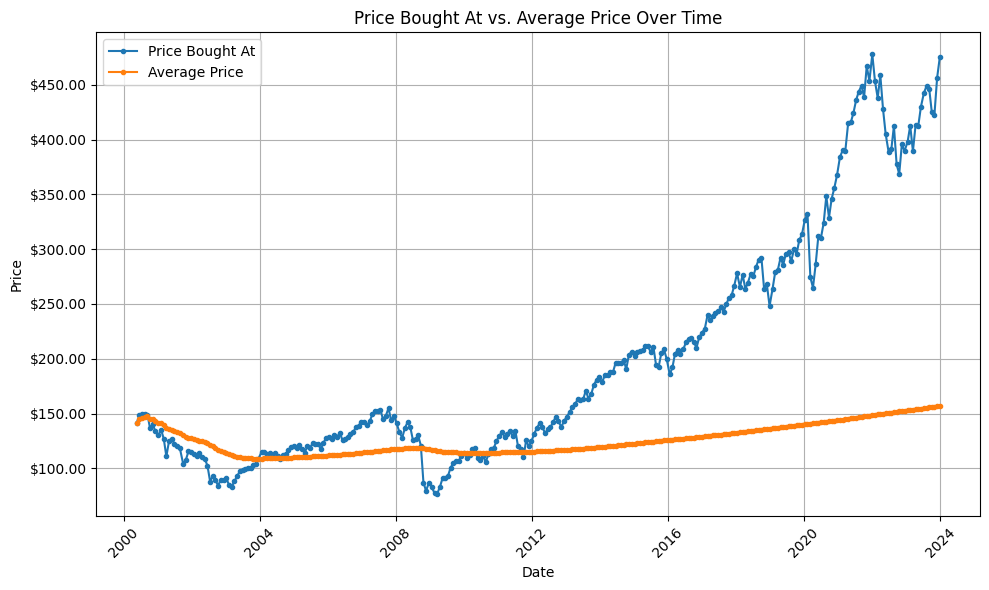

In [4]:
interval = 20
ticker_symbol = 'SPY'
monthly_investment = 100
start_date = '2000-04-20'
end_date = '2024-01-01'
fee_percentage = 0.0003
min_fee = 1

performance_data = dca_basic(interval, monthly_investment, ticker_symbol, start_date, end_date, fee_percentage, min_fee)

filtered_data = performance_data.loc[performance_data['Price Bought At'] != 0].copy()
filtered_data['Total Amount Spent'] = filtered_data['Price Bought At'] * filtered_data['Num Shares Bought']
filtered_data['Cumulative Total Amount Spent'] = filtered_data['Total Amount Spent'].cumsum()
filtered_data['Cumulative Num Shares Bought'] = filtered_data['Num Shares Bought'].cumsum()
filtered_data['Average Price'] = filtered_data['Cumulative Total Amount Spent'] / filtered_data['Cumulative Num Shares Bought']
    
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['Date'], filtered_data['Price Bought At'], label='Price Bought At', marker='o', markersize=3)
plt.plot(filtered_data['Date'], filtered_data['Average Price'], label='Average Price', marker='o', markersize=3)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Bought At vs. Average Price Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Formatting y-axis
formatter = FuncFormatter(lambda x, _: '${:,.2f}'.format(x))  # Define custom formatter
plt.gca().yaxis.set_major_formatter(formatter)  # Apply formatter to y-axis

plt.tight_layout()
plt.show()

Fetching $SPY data...
$SPY data fetched.
Fetching $SPY data...
$SPY data fetched.
Performing Basic DCA Strategy...
Fetching $SPY data...
$SPY data fetched.
Basic DCA Strategy completed.
Performing Basic DCA Strategy...
Fetching $SPY data...
$SPY data fetched.
Basic DCA Strategy completed.
Performing Basic DCA Strategy...
Fetching $SPY data...
$SPY data fetched.
Basic DCA Strategy completed.
Performing Basic DCA Strategy...
Fetching $SPY data...
$SPY data fetched.
Basic DCA Strategy completed.
Performing Basic DCA Strategy...
Fetching $SPY data...
$SPY data fetched.
Basic DCA Strategy completed.
Performing Basic DCA Strategy...
Fetching $SPY data...
$SPY data fetched.
Basic DCA Strategy completed.
Performing Basic DCA Strategy...
Fetching $SPY data...
$SPY data fetched.
Basic DCA Strategy completed.
Performing Basic DCA Strategy...
Fetching $SPY data...
$SPY data fetched.
Basic DCA Strategy completed.
Performing Basic DCA Strategy...
Fetching $SPY data...
$SPY data fetched.
Basic DCA St

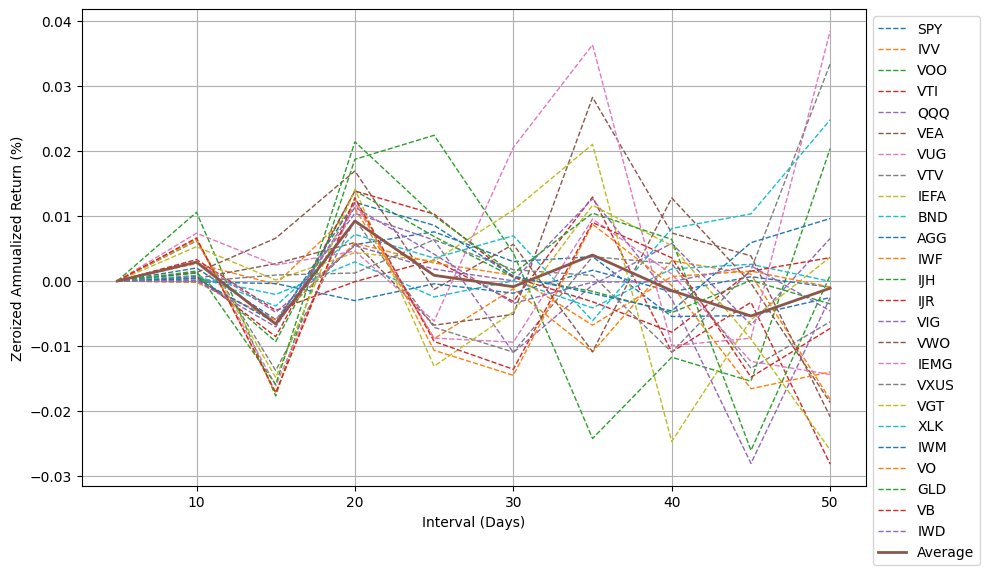

In [5]:
monthly_investment = 100
fee_percentage = 0.0003
min_fee = 1

ticker_symbols = ['SPY', 'IVV',  'VOO', 'VTI', 'QQQ',
                  'VEA', 'VUG', 'VTV', 'IEFA', 'BND', 
                  'AGG', 'IWF', 'IJH', 'IJR', 'VIG',
                  'VWO', 'IEMG', 'VXUS', 'VGT', 'XLK',
                  'IWM', 'VO', 'GLD', 'VB', 'IWD']

intervals = [i for i in range(5,51,5)]
all_return = []

plt.figure(figsize=(10, 6))

for ticker_symbol in ticker_symbols:

    start_date = fetch_stock_data(ticker_symbol)['Date'].iloc[0]
    end_date = fetch_stock_data(ticker_symbol)['Date'].iloc[-1]

    annualized_return_list, max_loss_list = dca_interval_analysis(intervals, monthly_investment, ticker_symbol, fee_percentage, min_fee, start_date, end_date)

    # Zeroize the y-values for annualized_return_list
    zeroized_annualized_return_list = [x - annualized_return_list[0] for x in annualized_return_list]
    all_return.append(zeroized_annualized_return_list)

    # Plot zeroized annualized_return_list
    plt.plot(intervals, [x * 100 for x in zeroized_annualized_return_list], label='{}'.format(ticker_symbol), linewidth=1, linestyle='--')

return_list = []
total_return = 0
for i in range(len(intervals)):
    print("For interval of {}".format(intervals[i]))
    for j in range(len(all_return)):
        total_return += all_return[j][i]
    try:
        average_return = total_return/len(all_return)
    except ZeroDivisionError:
        average_return = 0
    return_list.append(average_return)
    total_return = 0
    total_loss = 0

plt.plot(intervals, [x * 100 for x in return_list], label='{}'.format("Average"), linewidth=2)

# Add labels and title
title = "Zeroized Annualized Return vs Interval"
plt.xlabel('Interval (Days)')
plt.ylabel('Zeroized Amnualized Return (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True)

# Show plot
plt.tight_layout()
plt.savefig(f"{title}.png")  # Save it with a unique name based on its number

plt.show()
plt.close() 

Fetching $SPY data...
$SPY data fetched.
Fetching $SPY data...
$SPY data fetched.
Performing Basic DCA Strategy...
Fetching $SPY data...
$SPY data fetched.
Basic DCA Strategy completed.
Performing Basic DCA Strategy...
Fetching $SPY data...
$SPY data fetched.
Basic DCA Strategy completed.
Performing Basic DCA Strategy...
Fetching $SPY data...
$SPY data fetched.
Basic DCA Strategy completed.
Performing Basic DCA Strategy...
Fetching $SPY data...
$SPY data fetched.
Basic DCA Strategy completed.
Performing Basic DCA Strategy...
Fetching $SPY data...
$SPY data fetched.
Basic DCA Strategy completed.
Performing Basic DCA Strategy...
Fetching $SPY data...
$SPY data fetched.
Basic DCA Strategy completed.
Performing Basic DCA Strategy...
Fetching $SPY data...
$SPY data fetched.
Basic DCA Strategy completed.
Performing Basic DCA Strategy...
Fetching $SPY data...
$SPY data fetched.
Basic DCA Strategy completed.
Performing Basic DCA Strategy...
Fetching $SPY data...
$SPY data fetched.
Basic DCA St

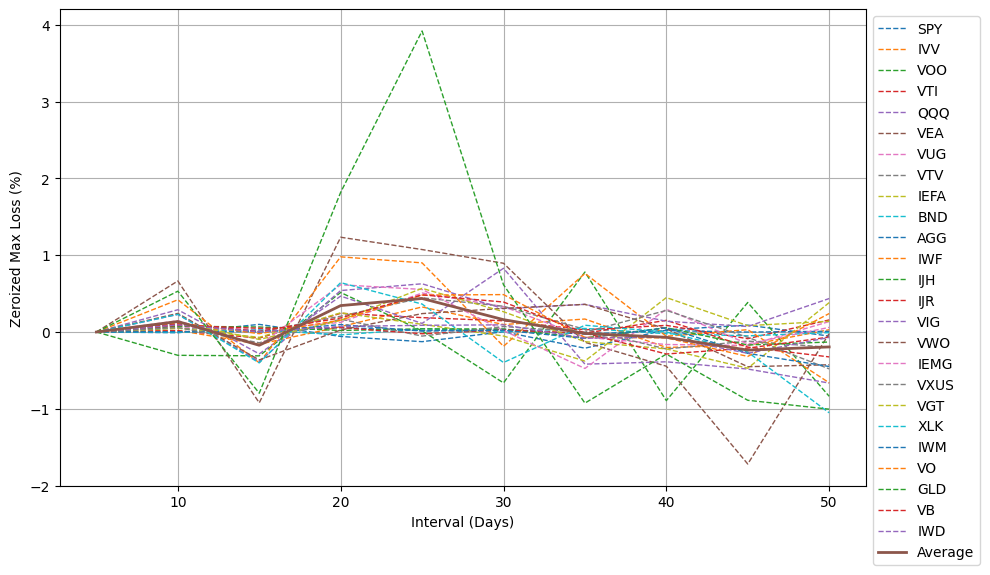

In [6]:

all_loss = []

plt.figure(figsize=(10, 6))

for ticker_symbol in ticker_symbols:

    start_date = fetch_stock_data(ticker_symbol)['Date'].iloc[0]
    end_date = fetch_stock_data(ticker_symbol)['Date'].iloc[-1]

    annualized_return_list, max_loss_list = dca_interval_analysis(intervals, monthly_investment, ticker_symbol, fee_percentage, min_fee, start_date, end_date)

    # Zeroize the y-values for annualized_return_list
    zeroized_max_loss_list = [x - max_loss_list[0] for x in max_loss_list]
    all_loss.append(zeroized_max_loss_list)

    # Plot zeroized annualized_return_list
    plt.plot(intervals, [x * 100 for x in zeroized_max_loss_list], label='{}'.format(ticker_symbol), linewidth=1, linestyle='--')

loss_list = []
total_loss = 0
for i in range(len(intervals)):
    print("For interval of {}".format(intervals[i]))
    for j in range(len(all_loss)):
        total_loss += all_loss[j][i]
    try:
        average_loss = total_loss/len(all_return)
    except ZeroDivisionError:
        average_loss = 0
    loss_list.append(average_loss)
    total_loss = 0

plt.plot(intervals, [x * 100 for x in loss_list], label='{}'.format("Average"), linewidth=2)


# Add labels and title
title = "Zeroized Max Loss vs Interval"
plt.xlabel('Interval (Days)')
plt.ylabel('Zeroized Max Loss (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True)

# Show plot
plt.tight_layout()
plt.savefig(f"{title}.png")  # Save it with a unique name based on its number

plt.show()
plt.close() 

Fetching $SPY data...
$SPY data fetched.
Fetching $SPY data...
$SPY data fetched.
Performing Basic DCA Strategy...
Fetching $SPY data...
$SPY data fetched.
Basic DCA Strategy completed.


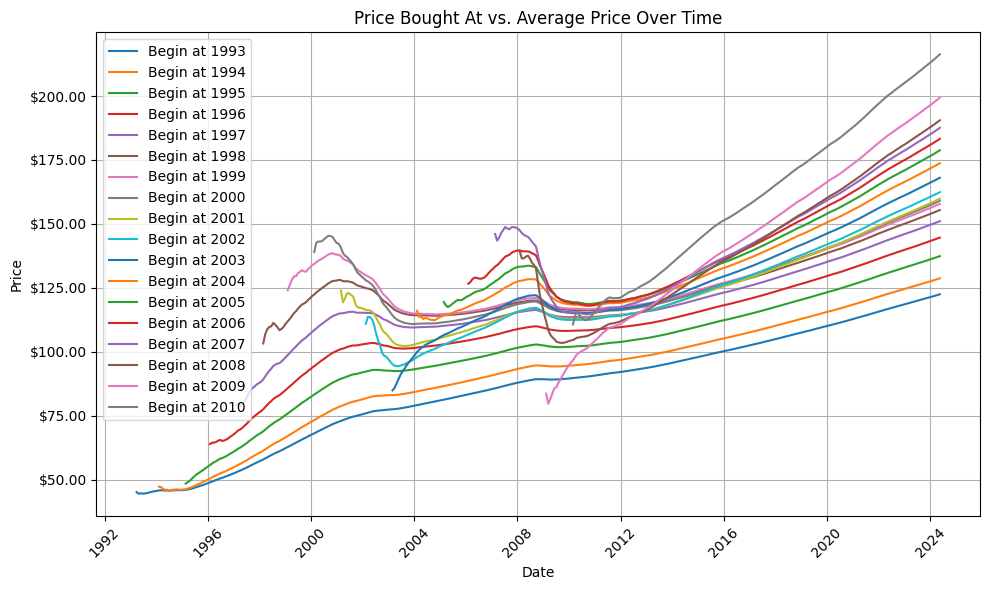

In [7]:
def plot_average_price(performance_data, start_year, end_year):

    # Convert 'Date' column to datetime format
    performance_data['Date'] = pd.to_datetime(performance_data['Date']) 

    # Plotting
    plt.figure(figsize=(10, 6))

    # Iterate over each start year
    for start_year in range(start_year, end_year+1):
        # Assuming 'Date' column is in 'YYYY-MM-DD' format
        filtered_data = performance_data.loc[performance_data['Date'].dt.year >= start_year].copy()
        filtered_data = filtered_data[filtered_data['Price Bought At'] != 0].copy()
        # Calculate cumulative values and average price
        filtered_data['Total Amount Spent'] = filtered_data['Price Bought At'] * filtered_data['Num Shares Bought']
        filtered_data['Cumulative Total Amount Spent'] = filtered_data['Total Amount Spent'].cumsum() - filtered_data['Price Bought At'].iloc[0] * filtered_data['Num Shares Bought'].iloc[0]
        filtered_data['Cumulative Num Shares Bought'] = filtered_data['Num Shares Bought'].cumsum() - filtered_data['Num Shares Bought'].iloc[0]
        filtered_data['Average Price'] = filtered_data['Cumulative Total Amount Spent'] / filtered_data['Cumulative Num Shares Bought']
        # Plot average price over time for each start year
        plt.plot(filtered_data['Date'], filtered_data['Average Price'], label='Begin at {}'.format(start_year))

    # Set labels, title, legend, and grid
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Price Bought At vs. Average Price Over Time')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)

    # Formatting y-axis
    formatter = FuncFormatter(lambda x, _: '${:,.2f}'.format(x))  # Define custom formatter
    plt.gca().yaxis.set_major_formatter(formatter)  # Apply formatter to y-axis

    plt.tight_layout()
    plt.show()

interval = 20
monthly_investment = 100
ticker_symbol = 'SPY'
start_date = fetch_stock_data(ticker_symbol)['Date'].iloc[0]
end_date = fetch_stock_data(ticker_symbol)['Date'].iloc[-1]
start_year = 1993
end_year = 2010
fee_percentage = 0.0003
min_fee = 1

performance_data = dca_basic(interval, monthly_investment, ticker_symbol, start_date, end_date, fee_percentage, min_fee)
plot_average_price(performance_data, start_year, end_year)